## Comparison of calculated vs. provided Angstrom coeffs (440-870) Aeronet V3

In [1]:
import pyaerocom as pya
pya.change_verbosity('critical')

VARS = ['ang4487aer', 'ang4487aer_calc', 'od550aer']
FILTER_NAME = 'WORLD-noMOUNTAINS'
TS_TYPE = 'monthly'
YEAR = 2010

OUT_DIR = 'output/'

start_str = str(YEAR) 
stop_str = '{}-12-31 23:59:00'.format(YEAR) 

2018-09-04 09:47:29,162:INFO:
Reading aliases ini file: /home/jonasg/github/pyaerocom/pyaerocom/data/aliases.ini
2018-09-04 09:47:29,990:WARNING:
geopy library is not available. Aeolus data read not enabled


### Aeronet V3 Level 2 and Level 1.5

Import data into 2 instance of ``UngriddedData`` class of pyaerocom.

In [2]:
reader = pya.io.ReadUngridded()
reader.logger.setLevel('CRITICAL')

data_l2 = reader.read_dataset(pya.const.AERONET_SUN_V3L2_AOD_DAILY_NAME,
                             vars_to_retrieve=VARS)
data_l15 = reader.read_dataset(pya.const.AERONET_SUN_V3L15_AOD_DAILY_NAME,
                             vars_to_retrieve=VARS)

In [3]:
print(data_l2)
print(data_l15)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev2.daily']
Contains variables: ['ang4487aer', 'ang4487aer_calc', 'od550aer']
Contains instruments: ['sun_photometer']
Total no. of stations: 1165

Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev1.5.daily']
Contains variables: ['ang4487aer', 'ang4487aer_calc', 'od550aer']
Contains instruments: ['sun_photometer']
Total no. of stations: 1278


Apply altitude filter (i.e. extract all stations that are below 1000 m altitude).

In [4]:
regfilter = pya.Filter(FILTER_NAME)
data_l2 = regfilter(data_l2)
data_l15 = regfilter(data_l15)

In [5]:
print(data_l2)
print(data_l15)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev2.daily']
Contains variables: ['ang4487aer', 'ang4487aer_calc', 'od550aer']
Contains instruments: ['sun_photometer']
Total no. of stations: 988
Filters that were applied:
 Filter time log: 20180904094800
	stat_lon: [-180, 180]
	stat_lat: [-90, 90]
	stat_alt: [-1000000.0, 1000.0]

Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev1.5.daily']
Contains variables: ['ang4487aer', 'ang4487aer_calc', 'od550aer']
Contains instruments: ['sun_photometer']
Total no. of stations: 1081
Filters that were applied:
 Filter time log: 20180904094836
	stat_lon: [-180, 180]
	stat_lat: [-90, 90]
	stat_alt: [-1000000.0, 1000.0]


Iterate over all stations in the data objects and extract data for ``ang4487aer`` (calculated and from files).

In [6]:
var_data_l2 = data_l2.get_variable_data(VARS, 
                                        start=start_str,
                                        stop=stop_str,
                                        ts_type=TS_TYPE)

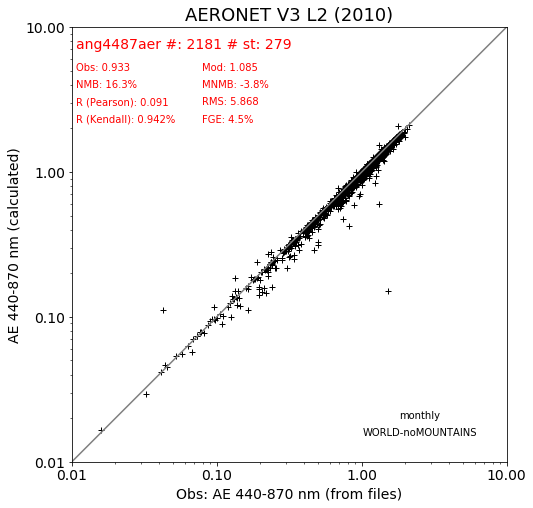

In [15]:
ax = pya.plot.plotscatter_new.plot_scatter(model_vals=var_data_l2['ang4487aer_calc'],
                                          obs_vals=var_data_l2['ang4487aer'],
                                          model_id='AE 440-870 nm (calculated)', 
                                          obs_id='AE 440-870 nm (from files)',
                                          var_name='ang4487aer',
                                          start=start_str, 
                                          stop=stop_str, 
                                          ts_type=TS_TYPE, 
                                          stations_ok=var_data_l2['num_stats']['ang4487aer'],
                                          filter_name=FILTER_NAME)
ax.set_title('AERONET V3 L2 (2010)')
ax.figure.savefig(OUT_DIR + 'ang4487aer_calc_vs_files_aeronetV3L2_ALL_VALS.png', dpi=300)

The statistics (RMS, Pearson R) indicate that there is some values that are far off the expectation range:

In [21]:
print('Data calculated (min, max)" {}, {}'.format(min(var_data_l2['ang4487aer_calc']), max(var_data_l2['ang4487aer_calc'])))
print('Data provided (min, max)" {}, {}'.format(min(var_data_l2['ang4487aer']), max(var_data_l2['ang4487aer'])))

Data calculated (min, max)" -0.10430745161859857, 2.1089175992072167
Data provided (min, max)" -249.7871925, 2.120656


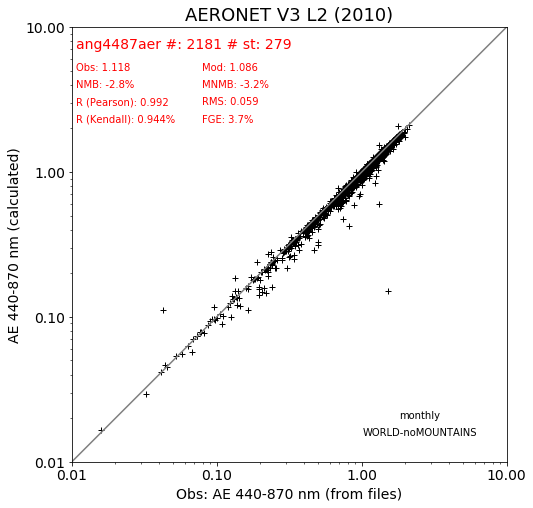

In [16]:
ax = pya.plot.plotscatter_new.plot_scatter(model_vals=var_data_l2['ang4487aer_calc'],
                                          obs_vals=var_data_l2['ang4487aer'],
                                          model_id='AE 440-870 nm (calculated)', 
                                          obs_id='AE 440-870 nm (from files)',
                                          var_name='ang4487aer',
                                          start=start_str, 
                                          stop=stop_str, 
                                          ts_type=TS_TYPE, 
                                          stations_ok=var_data_l2['num_stats']['ang4487aer'],
                                          filter_name=FILTER_NAME,
                                          lowlim_stats=0)
ax.set_title('AERONET V3 L2 (2010)')
ax.figure.savefig(OUT_DIR + 'ang4487aer_calc_vs_files_aeronetV3L2_VALS_EXCEEDING_ZERO.png', dpi=300)

In [8]:
var_data_l15 = data_l15.get_variable_data(VARS, 
                                          start=start_str,
                                          stop=stop_str,
                                          ts_type=TS_TYPE)

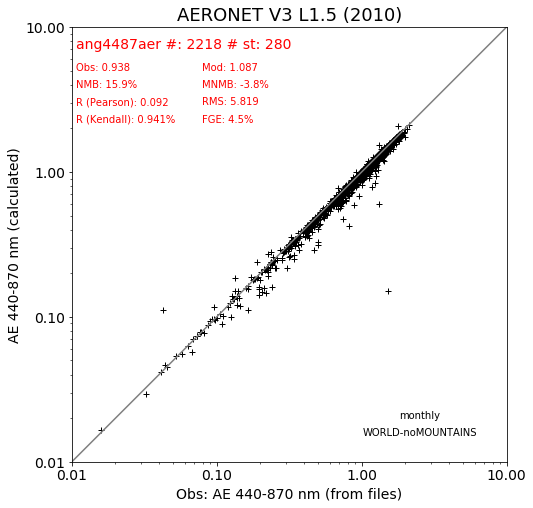

In [22]:
ax = pya.plot.plotscatter_new.plot_scatter(model_vals=var_data_l15['ang4487aer_calc'],
                                           obs_vals=var_data_l15['ang4487aer'],
                                           model_id='AE 440-870 nm (calculated)', 
                                           obs_id='AE 440-870 nm (from files)',
                                           var_name='ang4487aer',
                                           start=start_str, 
                                           stop=stop_str, 
                                           ts_type=TS_TYPE, 
                                           stations_ok=var_data_l15['num_stats']['ang4487aer'],
                                           filter_name=FILTER_NAME)
ax.set_title('AERONET V3 L1.5 (2010)')
ax.figure.savefig(OUT_DIR + 'ang4487aer_calc_vs_files_aeronetV3L15_ALL_VALS.png', dpi=300)

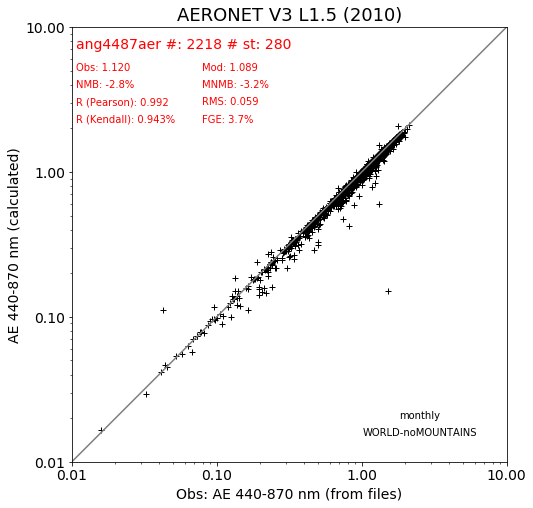

In [23]:
ax = pya.plot.plotscatter_new.plot_scatter(model_vals=var_data_l15['ang4487aer_calc'],
                                           obs_vals=var_data_l15['ang4487aer'],
                                           model_id='AE 440-870 nm (calculated)', 
                                           obs_id='AE 440-870 nm (from files)',
                                           var_name='ang4487aer',
                                           start=start_str, 
                                           stop=stop_str, 
                                           ts_type=TS_TYPE, 
                                           stations_ok=var_data_l15['num_stats']['ang4487aer'],
                                           filter_name=FILTER_NAME,
                                           lowlim_stats=0)
ax.set_title('AERONET V3 L1.5 (2010)')
ax.figure.savefig(OUT_DIR + 'ang4487aer_calc_vs_files_aeronetV3L15_VALS_EXCEEDING_ZERO.png', dpi=300)